<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/Disas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
#To check which files contin both attack labels and normal labels 
for j in range(0,41):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='Disas'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 28
n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36
n is 1 and j is 37
n is 1 and j is 38
n is 1 and j is 39
n is 1 and j is 40


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_28.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_36.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_37.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_38.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_39.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/2.Disas/Disas_40.csv"]), ignore_index=True)

In [ ]:
df.head()

,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,radiotap.datarate,radiotap.dbm_antsignal,radiotap.length,radiotap.mactime,radiotap.present.tsft,radiotap.rxflags,radiotap.timestamp.ts,radiotap.vendor_oui,wlan.duration,wlan.analysis.kck,wlan.analysis.kek,wlan.bssid,wlan.country_info.fnm,wlan.country_info.code,wlan.da,wlan.fc.ds,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.fcs.bad_checksum,wlan.fixed.beacon,wlan.fixed.capabilities.ess,wlan.fixed.capabilities.ibss,wlan.fixed.reason_code,wlan.fixed.timestamp,wlan.ra,wlan_radio.duration,wlan.rsn.ie.gtk.key,wlan.rsn.ie.igtk.key,wlan.rsn.ie.pmkid,wlan.sa,wlan.seq,wlan.ssid,wlan.ta,wlan.tag,wlan.tag.length,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.end_tsf,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.start_tsf,wlan_radio.phy,wlan_radio.timestamp,wlan.rsn.capabilities.mfpc,wlan_rsna_eapol.keydes.msgnr,wlan_rsna_eapol.keydes.data,wlan_rsna_eapol.keydes.data_len,wlan_rsna_eapol.keydes.key_info.key_mic,wlan_rsna_eapol.keydes.nonce,eapol.keydes.key_len,eapol.keydes.replay_counter,eapol.len,eapol.type,llc,arp,arp.hw.type,arp.proto.type,arp.hw.size,arp.proto.size,arp.opcode,arp.src.hw_mac,arp.src.proto_ipv4,arp.dst.hw_mac,arp.dst.proto_ipv4,ip.dst,ip.proto,ip.src,ip.ttl,ip.version,data.data,data.len,icmpv6.mldr.nb_mcast_records,icmpv6.ni.nonce,tcp.ack,tcp.ack_raw,tcp.analysis,tcp.analysis.flags,tcp.analysis.retransmission,tcp.analysis.reused_ports,tcp.analysis.rto_frame,tcp.checksum,tcp.checksum.status,tcp.flags.syn,tcp.dstport,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.option_len,tcp.payload,tcp.seq,tcp.seq_raw,tcp.srcport,tcp.time_delta,tcp.time_relative,udp.dstport,udp.srcport,udp.length,udp.payload,udp.time_relative,udp.time_delta,nbns,nbss.continuation_data,nbss.type,nbss.length,ldap,smb.access.generic_execute,smb.access.generic_read,smb.access.generic_write,smb.flags.notify,smb.flags.response,smb.flags2.nt_error,smb.flags2.sec_sig,smb.mid,smb.nt_status,smb.server_component,smb.pid.high,smb.tid,smb2.acct,smb2.auth_frame,smb2.buffer_code,smb2.cmd,smb2.data_offset,smb2.domain,smb2.fid,smb2.filename,smb2.header_len,smb2.host,smb2.msg_id,smb2.pid,smb2.previous_sesid,smb2.protocol_id,smb2.sesid,smb2.session_flags,smb2.tid,smb2.write_length,dhcp,dhcp.client_id.duid_ll_hw_type,dhcp.cookie,dhcp.hw.addr_padding,dhcp.hw.mac_addr,dhcp.id,dhcp.ip.client,dhcp.ip.relay,dhcp.ip.server,dhcp.option.broadcast_address,dhcp.option.dhcp_server_id,dhcp.option.router,dhcp.option.vendor.bsdp.message_type,mdns,dns,dns.a,dns.count.add_rr,dns.count.answers,dns.count.auth_rr,dns.count.labels,dns.count.queries,dns.flags.authoritative,dns.flags.checkdisable,dns.flags.opcode,dns.flags.response,dns.id,dns.ptr.domain_name,dns.qry.name,dns.qry.name.len,dns.resp.len,dns.resp.name,dns.resp.ttl,dns.resp.len.1,dns.retransmit_request,dns.retransmit_response,dns.time,ssdp,http.connection,http.content_length,http.content_type,http.date,http.file_data,http.host,http.last_modified,http.location,http.next_request_in,http.next_response_in,http.request.full_uri,http.request.line,http.request.method,http.request.uri.path,http.request.uri.query,http.request.uri.query.parameter,http.request.version,http.request_in,http.response.code,http.response.code.desc,http.response.line,http.response.phrase,http.response.version,http.response_for.uri,http.response_in,http.referer,http.time,http.server,json.value.string,json.key,ssh.cookie,ssh.compression_algorithms_client_to_server_length,ssh.compression_algorithms_server_to_client_length,ssh.direction,ssh.dh_gex.max,ssh.dh_gex.min,ssh.dh_gex.nbits,ssh.encryption_algorithms_client_to_server_length,ssh.encryption_algorithms_server_to_client_length,ssh.host_key.length,ssh.host_key.type_length,ssh.kex_algorithms_length,ssh.mac

In [ ]:
df.describe()

,frame.encap_type,frame.len,frame.number,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,radiotap.datarate,radiotap.dbm_antsignal,radiotap.length,radiotap.mactime,radiotap.timestamp.ts,radiotap.vendor_oui,wlan.duration,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.fcs.bad_checksum,wlan.fixed.beacon,wlan.fixed.capabilities.ess,wlan.fixed.capabilities.ibss,wlan.fixed.reason_code,wlan.fixed.timestamp,wlan_radio.duration,wlan.seq,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.end_tsf,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.start_tsf,wlan_radio.timestamp,wlan.rsn.capabilities.mfpc,wlan_rsna_eapol.keydes.msgnr,wlan_rsna_eapol.keydes.data_len,wlan_rsna_eapol.keydes.key_info.key_mic,eapol.keydes.key_len,eapol.keydes.replay_counter,eapol.len,eapol.type,arp.hw.type,arp.hw.size,arp.proto.size,arp.opcode,icmpv6.mldr.nb_mcast_records,icmpv6.ni.nonce,tcp.analysis.reused_ports,nbss.length,smb.access.generic_execute,smb.access.generic_read,smb.access.generic_write,smb.flags.notify,smb.flags.response,smb.flags2.nt_error,smb.flags2.sec_sig,smb.mid,smb.nt_status,smb.pid.high,smb.tid,smb2.acct,smb2.auth_frame,smb2.cmd,smb2.domain,smb2.header_len,smb2.host,smb2.msg_id,smb2.previous_sesid,smb2.session_flags,smb2.write_length,dhcp,dhcp.client_id.duid_ll_hw_type,dhcp.cookie,dhcp.hw.addr_padding,dhcp.hw.mac_addr,dhcp.id,dhcp.ip.client,dhcp.ip.relay,dhcp.ip.server,dhcp.option.broadcast_address,dhcp.option.dhcp_server_id,dhcp.option.router,dhcp.option.vendor.bsdp.message_type,dns.flags.authoritative,dns.ptr.domain_name,dns.resp.len,dns.retransmit_response,dns.time,http.content_length,http.next_request_in,http.next_response_in,http.request_in,http.response.code,http.response_in,http.time,ssh.cookie,ssh.compression_algorithms_client_to_server_length,ssh.compression_algorithms_server_to_client_length,ssh.direction,ssh.dh_gex.max,ssh.dh_gex.min,ssh.dh_gex.nbits,ssh.encryption_algorithms_client_to_server_length,ssh.encryption_algorithms_server_to_client_length,ssh.host_key.length,ssh.host_key.type_length,ssh.kex_algorithms_length,ssh.mac_algorithms_client_to_server_length,ssh.mac_algorithms_server_to_client_length,ssh.message_code,ssh.mpint_length,ssh.packet_length,ssh.packet_length_encrypted,ssh.padding_length,ssh.padding_string,ssh.protocol,ssh.server_host_key_algorithms_length,tls.alert_message.desc,tls.alert_message.level,tls.compress_certificate.compressed_certificate_message.length,tls.connection_id
count,743936.0,743936.000000,7.439360e+05,743936.000000,743936.000000,7.439360e+05,743936.000000,743936.0,743936.0,743936.0,479091.000000,743936.000000,743936.000000,4.790420e+05,7.439360e+05,0.0,743936.000000,743936.000000,743936.000000,743936.000000,743936.000000,743936.000000,743936.000000,743936.000000,743936.000000,0.0,2445.000000,16238.000000,16238.0,203.000000,2.445000e+03,743936.000000,296292.000000,743936.0,743936.000000,4.790420e+05,743936.0,743936.000000,4.790420e+05,4.790420e+05,2491.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,258.0,258.0,258.0,258.000000,28.000000,0.0,0.0,474.000000,13.0,13.0,13.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,9.0,474.000000,0.0,474.0,0.0,474.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,957.000000,0.0,0.0,116.0,630.000000,5.840000e+02,0.0,0.0,2.780000e+02,496.000000,0.0,278.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.000000,127.000000,10.000000,0.0
mean,23.0,456.780320,1.471970e+06,0.000267,0.000267,1.608312e+09,510.390379,0.0,1.0,5180.0,22.629070,-141.833877,58.789788,1.729497e+10,1.180093e+08,NaN,160.366866,0.000023,0.000028,0.001676,0.373653,0.001260,1.323186,0.041516,9.611721,NaN,1108.640082,0.692019,0.0,8.128079,7.426681e+16,72.748087,1946.990786,36.0,57.549879,1.729497e+10,5180.0,-46.286324,1.729497e+10,1.

In [ ]:
drop_cols = []
for i in df.columns:
    if len(df[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df.drop(drop_cols, 1, inplace=True)

print(df.columns)

Total columns with only 1 unique value: 52
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=202)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613718 entries, 0 to 613717
Columns: 202 entries, frame.len to Label
dtypes: float64(48), int64(17), object(137)
memory usage: 945.8+ MB


In [ ]:
df.dropna(1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613718 entries, 0 to 613717
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.len                   613718 non-null  int64  
 1   frame.number                613718 non-null  int64  
 2   frame.time                  613718 non-null  object 
 3   frame.time_delta            613718 non-null  float64
 4   frame.time_delta_displayed  613718 non-null  float64
 5   frame.time_epoch            613718 non-null  int64  
 6   frame.time_relative         613718 non-null  float64
 7   radiotap.dbm_antsignal      613718 non-null  int64  
 8   radiotap.length             613718 non-null  int64  
 9   radiotap.present.tsft       613718 non-null  object 
 10  radiotap.timestamp.ts       613718 non-null  int64  
 11  wlan.fc.ds                  613718 non-null  object 
 12  wlan.fc.frag                613718 non-null  int64  
 13  wlan.fc.order 

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal    161674
Disas      22442
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float32','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float32','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float32','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

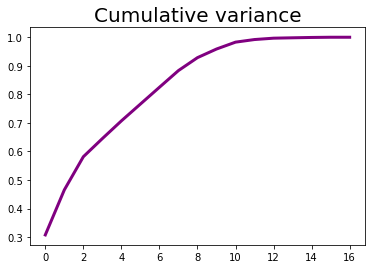

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
frame.len,0.814970,0.348813,0.015621,-0.005549,-0.045364,-0.000110,0.000516,0.009252,0.172392,0.109243,0.291860,-0.288878,-0.037902,-0.001805,0.003353,0.001060,-5.198689e-07
frame.number,-0.568856,0.793836,-0.059981,-0.108542,0.053200,0.012003,-0.000788,-0.004624,-0.080870,0.084719,-0.011338,-0.009838,0.007746,0.069413,-0.093079,0.019212,-6.538968e-07
frame.time_epoch,-0.577822,0.796219,-0.063664,-0.104662,0.050696,0.011732,-0.000242,-0.003191,-0.080429,0.064542,-0.014254,0.005771,-0.008966,-0.035847,0.045579,-0.010566,-2.952506e-03
radiotap.dbm_antsignal,0.209477,0.014794,-0.968071,-0.027105,-0.020682,0.021580,-0.004080,0.001942,0.047052,-0.085525,-0.024491,-0.008126,0.017701,0.031555,-0.004551,-0.074623,-1.340254e-07
radiotap.length,0.901064,0.295043,0.078158,-0.159264,-0.035841,-0.011477,-0.002709,0.027297,-0.127663,-0.066133,-0.025137,0.013681,0.201029,-0.062419,-0.039649,-0.004577,-5.128574e-07


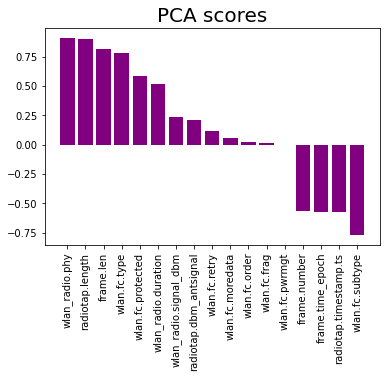

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']

plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()